# ReEDS Scenarios on PV ICE Tool STATES

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### Reading REEDS original file to get list of SCENARIOs, PCAs, and STATEs 

In [3]:
r"""
reedsFile = str(Path().resolve().parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx')
print ("Input file is stored in %s" % reedsFile)

rawdf = pd.read_excel(reedsFile,
                        sheet_name="UPV Capacity (GW)")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
#rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True)
rawdf.set_index(['Scenario','Year','PCA', 'State'], inplace=True)

scenarios = list(rawdf.index.get_level_values('Scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
STATEs = list(rawdf.index.get_level_values('State').unique())

simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
simulationname
SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
"""

'\nreedsFile = str(Path().resolve().parent.parent.parent / \'December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx\')\nprint ("Input file is stored in %s" % reedsFile)\n\nrawdf = pd.read_excel(reedsFile,\n                        sheet_name="UPV Capacity (GW)")\n                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels\n#now set year as an index in place\n#rawdf.drop(columns=[\'State\'], inplace=True)\nrawdf.drop(columns=[\'Tech\'], inplace=True)\nrawdf.set_index([\'Scenario\',\'Year\',\'PCA\', \'State\'], inplace=True)\n\nscenarios = list(rawdf.index.get_level_values(\'Scenario\').unique())\nPCAs = list(rawdf.index.get_level_values(\'PCA\').unique())\nSTATEs = list(rawdf.index.get_level_values(\'State\').unique())\n\nsimulationname = scenarios\nsimulationname = [w.replace(\'+\', \'_\') for w in simulationname]\nsimulationname\nSFscenarios = [simulationname[0], simulationname[4], simulationname[8]]\n'

### Reading GIS inputs

In [4]:
r"""
GISfile = str(Path().resolve().parent.parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')
GIS.head()
GIS.loc['p1'].long
"""

"\nGISfile = str(Path().resolve().parent.parent.parent.parent / 'gis_centroid_n.xlsx')\nGIS = pd.read_excel(GISfile)\nGIS = GIS.set_index('id')\nGIS.head()\nGIS.loc['p1'].long\n"

### Create Scenarios in PV_ICE

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [5]:
SFscenarios = ['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']
SFscenarios

['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']

In [6]:
STATEs = ['WA',  'CA',  'VA',  'FL',  'MI',  'IN',  'KY',  'OH',  'PA',  'WV',  'NV',  'MD',
 'DE',  'NJ',  'NY',  'VT',  'NH',  'MA',  'CT',  'RI',  'ME',  'ID',  'MT',  'WY',  'UT',  'AZ',  'NM',
 'SD',  'CO',  'ND',  'NE',  'MN',  'IA',  'WI',  'TX',  'OK',  'OR',  'KS',  'MO',  'AR',  'LA',  'IL',  'MS',
 'AL',  'TN',  'GA',  'SC',  'NC']  

### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [7]:
#for ii in range (0, 1): #len(scenarios):
i = 0
r1 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)    
    r1.createScenario(name=STATEs[jj], file=filetitle)
    r1.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\SolarFutures_2021\baseline_material_glass_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\SolarFutures_2021\baseline_material_silicon_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\SolarFutures_2021\baseline_material_silver_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\SolarFutures_2021\baseline_material_copper_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\SolarFutures_2021\baseline_material_aluminium_Reeds.csv')


i = 1
r2 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)        
    r2.createScenario(name=STATEs[jj], file=filetitle)
    r2.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\SolarFutures_2021\baseline_material_glass_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\SolarFutures_2021\baseline_material_silicon_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\SolarFutures_2021\baseline_material_silver_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\SolarFutures_2021\baseline_material_copper_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\SolarFutures_2021\baseline_material_aluminium_Reeds.csv')


i = 2
r3 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)
for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)        
    r3.createScenario(name=STATEs[jj], file=filetitle)
    r3.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\SolarFutures_2021\baseline_material_glass_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\SolarFutures_2021\baseline_material_silicon_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\SolarFutures_2021\baseline_material_silver_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\SolarFutures_2021\baseline_material_copper_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\SolarFutures_2021\baseline_material_aluminium_Reeds.csv')


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


# Calculate Mass Flow

In [8]:
IRENA= False
PERFECTMFG = True

mats = ['glass', 'silicon','silver','copper','aluminum']

ELorRL = 'EL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta':30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta':30}  # Regular-loss scenario IRENA
    
    if PERFECTMFG:
        for jj in range (0, len(r1.scenario.keys())):
            r1.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r1.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0
            r2.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r2.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0
            r3.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r3.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0

            for kk in range(0, len(mats)):
                mat = mats[kk]
                r1.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
                r2.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
                r3.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
    
    r1.calculateMassFlow(weibullInputParams=weibullInputParams)
    r2.calculateMassFlow(weibullInputParams=weibullInputParams)
    r3.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    r2.calculateMassFlow()
    r3.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  WA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  VA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  FL
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Materia

==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  IA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WI
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  TX
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  OK
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Materi

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NH
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  MA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CT
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminu

Working on Scenario:  NC
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  VA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Materia

==> Working on Material :  aluminum
Working on Scenario:  MN
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  IA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WI
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  TX
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Mater

In [9]:
print("STATEs:", r1.scenario.keys())
print("Module Keys:", r1.scenario[STATEs[jj]].data.keys())
print("Material Keys: ", r1.scenario[STATEs[jj]].material['glass'].materialdata.keys())

STATEs: dict_keys(['WA', 'CA', 'VA', 'FL', 'MI', 'IN', 'KY', 'OH', 'PA', 'WV', 'NV', 'MD', 'DE', 'NJ', 'NY', 'VT', 'NH', 'MA', 'CT', 'RI', 'ME', 'ID', 'MT', 'WY', 'UT', 'AZ', 'NM', 'SD', 'CO', 'ND', 'NE', 'MN', 'IA', 'WI', 'TX', 'OK', 'OR', 'KS', 'MO', 'AR', 'LA', 'IL', 'MS', 'AL', 'TN', 'GA', 'SC', 'NC'])
Module Keys: Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled', 'mod_Repair',
       'mod_MerchantTail', 'mod_Reuse', 'irradiance_stc', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'WeibullParams', 'EOL_on_Year_0',
       'EOL_on_Year_1', 'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4',
       'EOL_on_Year_5', 'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8',


# OPEN EI

In [10]:
kk=0
SFScenarios = [r1, r2, r3]
SFScenarios[kk].name


'Reference.Mod'

In [11]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    for zz in range (0, len(STATEs)):

        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
                if keywdcumneed[jj]:
                    for ii in range (0, len(materials)):    
                        sentit = '@value|Cumulative'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                        foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyw[jj]].cumsum()/keywscale[jj] 

            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]]/keywscale[jj] 

                if keywdcumneed[jj]:
                    sentit = '@value|Cumulative'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                    foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]].cumsum()/keywscale[jj] 
                  

        foo['@states'] = STATEs[zz]
        foo['@scenario|Solar Futures'] = SFScenarios[kk].name
        foo['@timeseries|Year'] = SFScenarios[kk].scenario[STATEs[zz]].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' OpenEI.csv', index=False)

print("Done")

Done


In [12]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    for zz in range (0, len(STATEs)):

        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]]/keywscale[jj] 



        foo['@states'] = STATEs[zz]
        foo['@scenario|Solar Futures'] = SFScenarios[kk].name
        foo['@timeseries|Year'] = SFScenarios[kk].scenario[STATEs[zz]].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' OpenEI Yearly Only.csv', index=False)

print("Done")

Done


In [13]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    for zz in range (0, len(STATEs)):

        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':

                if keywdcumneed[jj]:
                    for ii in range (0, len(materials)):    
                        sentit = '@value|Cumulative'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                        foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyw[jj]].cumsum()/keywscale[jj] 

            else:

                if keywdcumneed[jj]:
                    sentit = '@value|Cumulative'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                    foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]].cumsum()/keywscale[jj] 
                  

        foo['@states'] = STATEs[zz]
        foo['@scenario|Solar Futures'] = SFScenarios[kk].name
        foo['@timeseries|Year'] = SFScenarios[kk].scenario[STATEs[zz]].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' OpenEI Cumulatives Only.csv', index=False)

print("Done")

Done


In [14]:
# WORK ON THIS FOIR OPENEI
# SCENARIO DIFERENCeS

keyw=['new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['NewInstalledCapacity','InstalledCapacity'] 
keywprint = ['NewInstalledCapacity','InstalledCapacity'] 
sfprint = ['Reference','Grid Decarbonization', 'High Electrification'] 

keywunits = ['MW','MW']
keywdcumneed = [True,False]
keywdlevel = ['module','module']
keywscale = [1,1e6]
materials = []

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
    
for zz in range (0, len(STATEs)):

    foo = pd.DataFrame()
    
    for jj in range (0, len(keyw)):
           
        # kk -- scenario
        for kk in range(0, 3):
            sentit = '@value|'+keywprint[jj]+'|'+sfprint[kk]+'#'+keywunits[jj]
            #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
            foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]]/keywscale[jj] 

            if keywdcumneed[jj]:
                sentit = '@value|Cumulative'+keywprint[jj]+'|'+sfprint[kk]+'#'+keywunits[jj]
                foo[sentit] = SFScenarios[kk].scenario[STATEs[zz]].data[keyw[jj]].cumsum()/keywscale[jj] 

    #        foo['@value|scenario|Solar Futures'] = SFScenarios[kk].name
    foo['@states'] = STATEs[zz]
    foo['@timeseries|Year'] = SFScenarios[kk].scenario[STATEs[zz]].data.year
    scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]

#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' OpenEI ScenarioDifferences.csv', index=False)

print("Done")

Done


In [15]:
scenariolist.head()

,@states,@timeseries|Year,@value|NewInstalledCapacity|Reference#MW,@value|CumulativeNewInstalledCapacity|Reference#MW,@value|NewInstalledCapacity|Grid Decarbonization#MW,@value|CumulativeNewInstalledCapacity|Grid Decarbonization#MW,@value|NewInstalledCapacity|High Electrification#MW,@value|CumulativeNewInstalledCapacity|High Electrification#MW,@value|InstalledCapacity|Reference#MW,@value|InstalledCapacity|Grid Decarbonization#MW,@value|InstalledCapacity|High Electrification#MW
0,WA,2010,0.181050,0.181050,0.181050,0.181050,0.181050,0.181050,0.182282,0.182282,0.182282
1,WA,2011,6.751975,6.933025,6.751975,6.933025,6.751975,6.933025,6.977740,6.977740,6.977740
2,WA,2012,6.751975,13.685001,6.751975,13.685001,6.751975,13.685001,13.728302,13.728302,13.728302
3,WA,2013,9.582476,23.267476,9.582477,23.267477,9.582477,23.267477,23.306026,23.306027,23.306027
4,WA,2014,9.582476,32.849952,9.582477,32.849954,9.582477,32.849954,32.846403,32.846405,32.846405


# SAVE DATA FOR BILLY: STATES

In [16]:
#for 3 significant numbers rounding
N = 2

SFScenarios[kk].scenario[PCAs[zz]].data.year

Index 20 --> 2030

Index 30 --> 2040

Index 40 --> 2050

In [17]:
idx2030 = 20
idx2040 = 30
idx2050 = 40
print("index ", idx2030, " is year ", r1.scenario[STATEs[0]].data['year'].iloc[idx2030])
print("index ", idx2040, " is year ", r1.scenario[STATEs[0]].data['year'].iloc[idx2040])
print("index ", idx2050, " is year ", r1.scenario[STATEs[0]].data['year'].iloc[idx2050])

index  20  is year  2030
index  30  is year  2040
index  40  is year  2050


#### 6 - STATE Cumulative Virgin Needs by 2050


In [18]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(STATEs)):
            keywordsum.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=STATEs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 6 - STATE Cumulative2050 VirginMaterialNeeds_tons.csv')

In [19]:
SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword]

0     1.453878e+08
1     1.107787e+09
2     1.084215e+09
3     3.383155e+09
4     3.266099e+09
5     8.643166e+09
6     7.931744e+09
7     7.173017e+09
8     6.809346e+09
9     4.285922e+09
10    3.976719e+09
11    4.714018e+08
12    4.534323e+08
13    6.387699e+08
14    6.078930e+08
15    9.829633e+08
16    9.488859e+08
17    1.950642e+10
18    1.901376e+10
19    3.409841e+09
20    3.326317e+09
21    3.470388e+10
22    3.450642e+10
23    2.131930e+10
24    2.121362e+10
25    3.140724e+10
26    3.126931e+10
27    1.985550e+10
28    1.977723e+10
29    1.580074e+09
30    1.574424e+09
31    1.917670e+09
32    1.911396e+09
33    1.843109e+09
34    1.837551e+09
35    9.851720e+09
36    9.824170e+09
37    4.815710e+09
38    4.803155e+09
39    1.260341e+09
40    1.257263e+09
Name: mat_Virgin_Stock, dtype: float64

#### 7 - STATE Cumulative EoL Only Waste by 2050

In [20]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(STATEs)):
            keywordsum.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=STATEs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 7 - STATE Cumulative2050 Waste_EOL_tons.csv')

##### 8 - STATE Yearly Virgin Needs 2030 2040 2050

In [21]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 8 - STATE Yearly 2030 2040 2050 VirginMaterialNeeds_tons.csv')

#### 9 - STATE Yearly EoL Waste 2030 2040 205

In [22]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tonnes
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 9 - STATE Yearly 2030 2040 2050 Waste_EOL_tons.csv')

# APPENDIX TABLES



#### Appendix - Cumulative Virgin Stock

In [23]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = pd.DataFrame()
    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []
        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:20].sum())
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:30].sum())
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:].sum())
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons

# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='glass_2050', ascending=False)
    scen.sum(axis=0)
    reduced = scen.iloc[0:23]
    new_row = pd.Series(data=scen.iloc[23::].sum(axis=0), name='OTHER STATES')
    new_row_2 = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    reduced = reduced.append(new_row_2, ignore_index=False)
    reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Cumulative Virgin Stock by State.csv')

#### Appendix - Yearly Virgin Stock

In [24]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons


# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='glass_2050', ascending=False)
    reduced = scen.iloc[0:23]
    new_row = pd.Series(data=scen.iloc[23::].sum(axis=0), name='OTHER STATES')
    new_row_2 = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    reduced = reduced.append(new_row_2, ignore_index=False)
    reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Yearly Virgin Stock by State.csv')

#### Appendix - Cumulative EOL_ WASTE by State

In [25]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = pd.DataFrame()
    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []
        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:20].sum())
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:30].sum())
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:].sum())
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons

# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    #scen = scen.sort_values(by='glass_2050', ascending=False)
    reduced = scen
    new_row = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    #reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    #reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Cumulative EOL_ WASTE by State.csv')

#####  Sparkplots  +  APPENDIX - Yearly EoL Waste 

In [28]:
sparkplotfolder = os.path.join(testfolder, 'SPARKPLOTS')
if not os.path.exists(sparkplotfolder):
    os.makedirs(sparkplotfolder)


In [29]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
            # SPARK PLOT
            if materials[ii] == 'glass':
                fig, axs = plt.subplots(figsize=(2, 1), facecolor='w', edgecolor='k')
                #axs.ioff()
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year, SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword]/1000000, 'k')
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2030], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030]/1000000, 'r.',markersize=12)
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2040], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040]/1000000, 'r.', markersize=12)
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2050], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050]/1000000, 'r.', markersize=12)
                #plt.ylabel('Tonnes')
                axs.set_xlim([2020, 2052])
                #axs.set_visible(False)
                axs.axis('off')
                figtitle = title_Method+ ' ' + SFScenarios[kk].name + ' Fig_2x1_GLASS_Waste_'+STATEs[zz]+'.png'
                #figtitle = os.path.join('SPARKPLOTS', figtitle)
                #fig.savefig(figtitle, dpi=600)
                fig.savefig(os.path.join(sparkplotfolder, figtitle), dpi=600)
                plt.close(fig) # This avoids the figure from displayig and getting all the warnings
                
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons


# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='State')
    reduced = scen
    new_row = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
#   reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#   reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Yearly EOL Waste by State.csv')

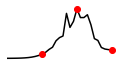

In [30]:
# PLOT HERE
fig, axs = plt.subplots(figsize=(2, 1), facecolor='w', edgecolor='k')
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year, SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword]/1000000, 'k')
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2030], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2030]/1000000, 'r.',markersize=12)
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2040], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2040]/1000000, 'r.', markersize=12)
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[idx2050], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][idx2050]/1000000, 'r.', markersize=12)
#plt.ylabel('Tonnes')
axs.set_xlim([2020, 2052])
#axs.set_visible(False)
axs.axis('off');
